Source : 

* https://avandekleut.github.io/vae/

In [82]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import torch.nn.functional as F

import torchvision
import torchvision.datasets as datasets
from torchvision.transforms import ToTensor
from torchvision.utils import save_image

import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
# set the device
device = torch.device('cuda' if torch.cuda.is_available() else 'mps' if torch.backends.mps.is_available() else "cpu")
device

device(type='mps')

In [84]:
## Load Data

train_data = datasets.MNIST(root='../datasets/',train= True,download=True, transform= ToTensor())
# test_data = datasets.MNIST(root='../datasets/',train= False,download=True, transform= ToTensor())


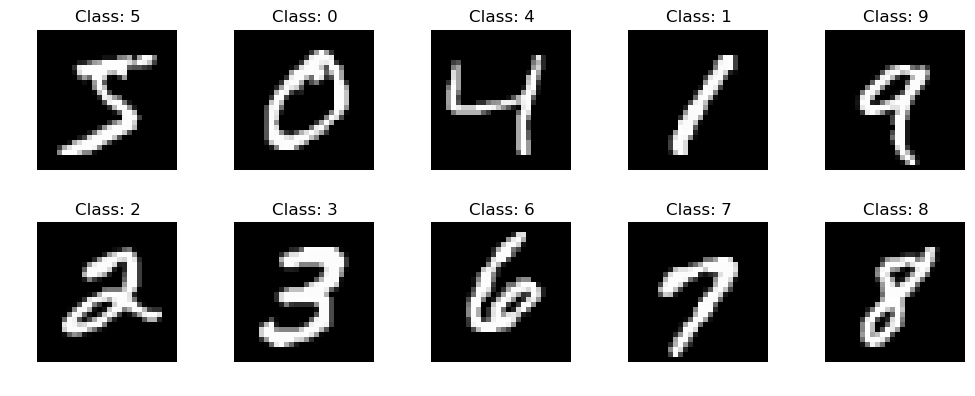

In [85]:

# Create a dictionary to store one image per class
class_images = {}

# Iterate over the dataset and store one image per class
for image, label in train_data:
    if label not in class_images:
        class_images[label] = image
        if len(class_images) == 10:  # Stop after storing one image per class
            break

# Display the images from each class
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, (label, image) in enumerate(class_images.items()):
    ax = axes[i // 5, i % 5]
    ax.imshow(image.squeeze(), cmap='gray')
    ax.set_title(f"Class: {label}")
    ax.axis('off')

plt.tight_layout()
plt.show()


In [86]:
# Hyperparameters
batch_size = 128
epochs = 2

image_sz = 28*28
hidden_sz = 512
latent_sz = 2

In [87]:
train_loader =DataLoader(train_data,batch_size,True,num_workers=4)
test_loader =DataLoader(test_data,batch_size,True,num_workers=4)

In [88]:
for data,label in train_loader:
    
    print(data.shape,label.shape)
    # print(label)
    print(data.max(),data.min())
    break

torch.Size([128, 1, 28, 28]) torch.Size([128])
tensor(1.) tensor(0.)


### Autoencoder

In [90]:
class Encoder(nn.Module):

    def __init__(self):
        super(Encoder,self).__init__()

        self.linear1 = nn.Linear(image_sz,hidden_sz)
        self.linear2 = nn.Linear(hidden_sz,latent_sz)

    def forward(self,x):
        x = x.flatten(start_dim=1)
        out = F.relu(self.linear1(x))
        return self.linear2(out)

class Decoder(nn.Module):

    def __init__(self):
        super(Decoder,self).__init__()

        self.linear1 = nn.Linear(latent_sz,hidden_sz)
        self.linear2 = nn.Linear(hidden_sz,image_sz)

    def forward(self,z):

        out = F.relu(self.linear1(z))
        return torch.sigmoid(self.linear2(out))

class AutoEncoder(nn.Module):

    def __init__(self):
        super(AutoEncoder,self).__init__()

        self.encode = Encoder()
        self.decode = Decoder()

    def forward(self,x):
        z = self.encode(x)
        return self.decode(z)
        

model = AutoEncoder().to(device)

In [91]:
data = torch.rand(128,1,28,28,device=device)
model(data).shape

torch.Size([128, 784])

In [96]:
criterion = nn.BCELoss(reduction='mean')
optimizer = torch.optim.Adam(model.parameters(),lr=1e-3)

In [113]:
data.flatten(start_dim=1).shape

torch.Size([128, 784])

In [116]:
def train(model, data, epochs=20):
    opt = torch.optim.Adam(autoencoder.parameters())
    for epoch in range(epochs):
        for x, y in train_data:
            x = x.to(device) # GPU
            
            x_hat = model(x)
            loss = criterion(x.flatten(start_dim=1),x_hat)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        print('Epoch',epoch,'-'*10)
    return model

In [117]:
autoencoder = train(model, train_data,epochs)

Epoch 0 ----------
Epoch 1 ----------
